### Practical Questions:

Q21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

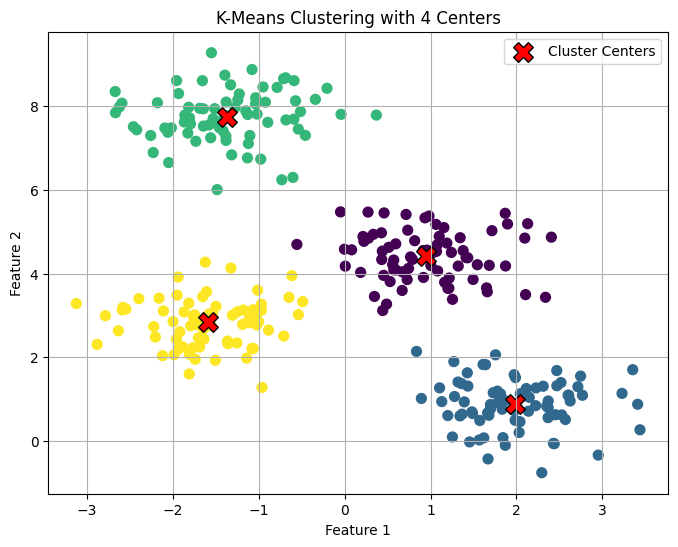

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0, n_init=10)
pred_y = kmeans.fit_predict(X)

# 3. Visualize using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=pred_y, s=50, cmap='viridis')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', edgecolors='black', label='Cluster Centers')

plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [58]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data

# 2. Use Agglomerative Clustering to group the data into 3 clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
predicted_labels = agglomerative_clustering.fit_predict(X_iris)

# 3. Display the first 10 predicted labels
print("First 10 predicted labels:", predicted_labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


Q23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

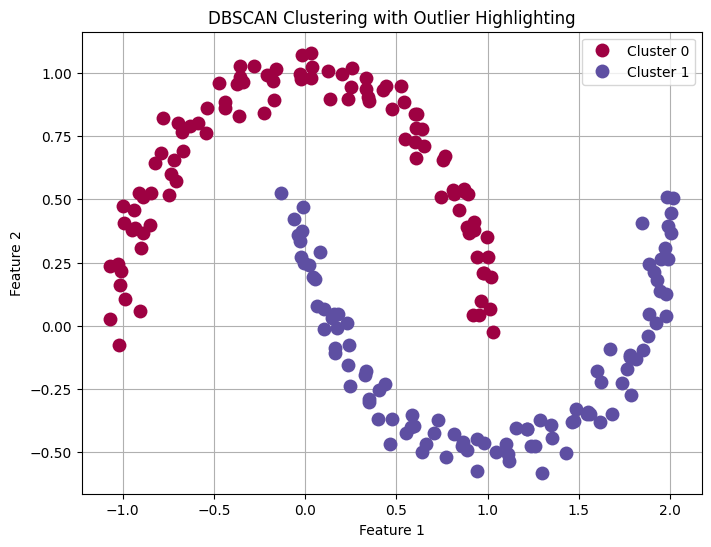

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic data using make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5) # You might need to adjust eps and min_samples for optimal results
labels = dbscan.fit_predict(X)

# 3. Visualize using a scatter plot and highlight outliers
plt.figure(figsize=(8, 6))

# Get unique labels (clusters and noise)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1: # Black used for noise.
        col = [0, 0, 0, 1]
        marker_style = 'o'
        edge_color = 'red'
        label_text = 'Outliers'
    else:
        marker_style = 'o'
        edge_color = 'none'
        label_text = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
             markeredgecolor=edge_color, markersize=10, label=label_text)

plt.title('DBSCAN Clustering with Outlier Highlighting')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [60]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Wine dataset
wine = datasets.load_wine()
X_wine = wine.data

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Apply K-Means clustering (Wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
predicted_clusters = kmeans.fit_predict(X_scaled)

# 4. Print the size of each cluster
cluster_sizes = np.bincount(predicted_clusters)
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} samples")

Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


Q25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

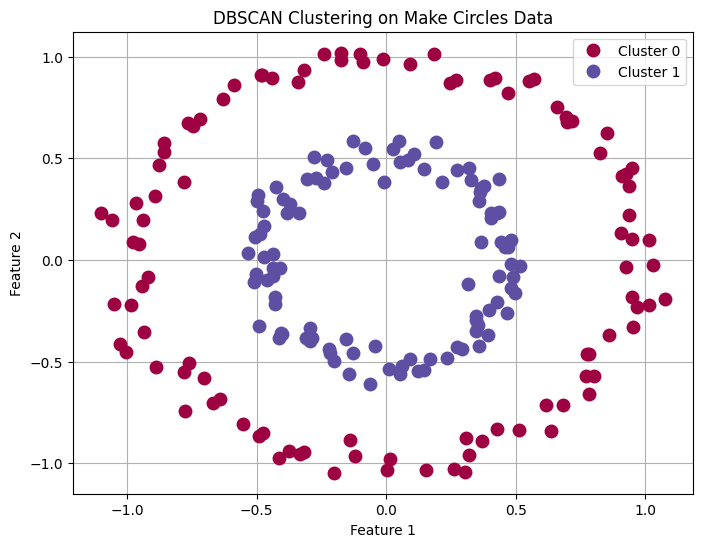

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic data using make_circles
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=0)

# 2. Apply DBSCAN
# Adjust eps and min_samples for optimal results on circle data
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(8, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1: # Black for noise (outliers)
        col = [0, 0, 0, 1]
        marker_style = 'o'
        edge_color = 'red'
        label_text = 'Outliers'
    else:
        marker_style = 'o'
        edge_color = 'none'
        label_text = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
             markeredgecolor=edge_color, markersize=10, label=label_text)

plt.title('DBSCAN Clustering on Make Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [62]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X_bc = breast_cancer.data

# 2. Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled_bc = scaler.fit_transform(X_bc)

# 3. Use K-Means with 2 clusters
kmeans_bc = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_bc.fit(X_scaled_bc)

# 4. Output the cluster centroids
print("Cluster Centroids:\n", kmeans_bc.cluster_centers_)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


Q27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

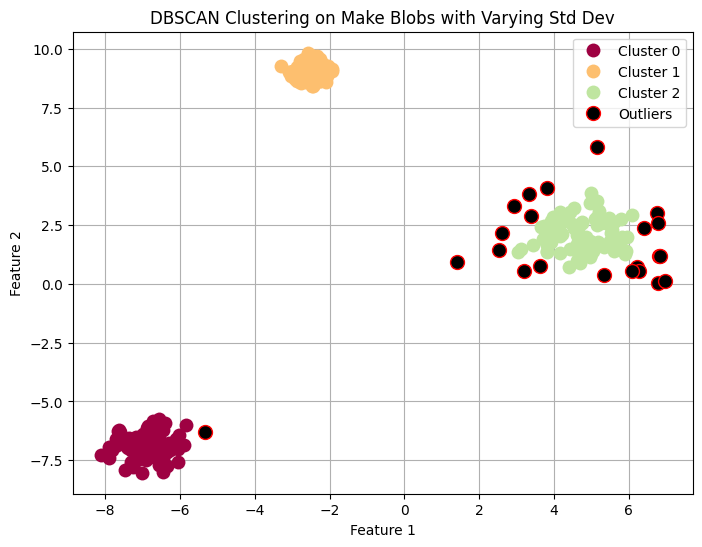

In [63]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic data using make_blobs with varying cluster standard deviations
# Here, we define 3 centers with different standard deviations
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=[0.3, 1.0, 0.5], random_state=42)

# 2. Apply DBSCAN
# Adjust eps and min_samples based on the varying densities
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Visualize using a scatter plot and highlight outliers
plt.figure(figsize=(8, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1: # Black used for noise/outliers
        col = [0, 0, 0, 1]
        marker_style = 'o'
        edge_color = 'red'
        label_text = 'Outliers'
    else:
        marker_style = 'o'
        edge_color = 'none'
        label_text = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
             markeredgecolor=edge_color, markersize=10, label=label_text)

plt.title('DBSCAN Clustering on Make Blobs with Varying Std Dev')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

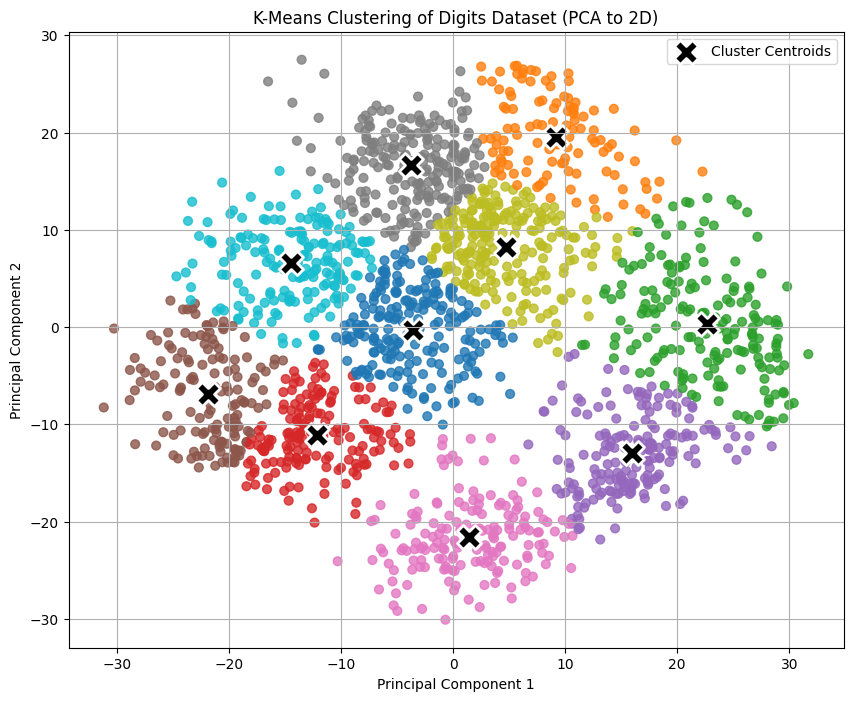

In [64]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # True labels (for reference, not used in clustering itself)

# 2. Reduce it to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Apply K-Means clustering (Digits dataset has 10 classes)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
pred_clusters = kmeans.fit_predict(X_pca)

# 4. Visualize clusters using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_clusters, cmap='tab10', s=40, alpha=0.8)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, marker='X', c='black', edgecolors='white', linewidth=2, label='Cluster Centroids')

plt.title('K-Means Clustering of Digits Dataset (PCA to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Q29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

Silhouette Score for k=2: 0.5955
Silhouette Score for k=3: 0.7613
Silhouette Score for k=4: 0.7911
Silhouette Score for k=5: 0.6633


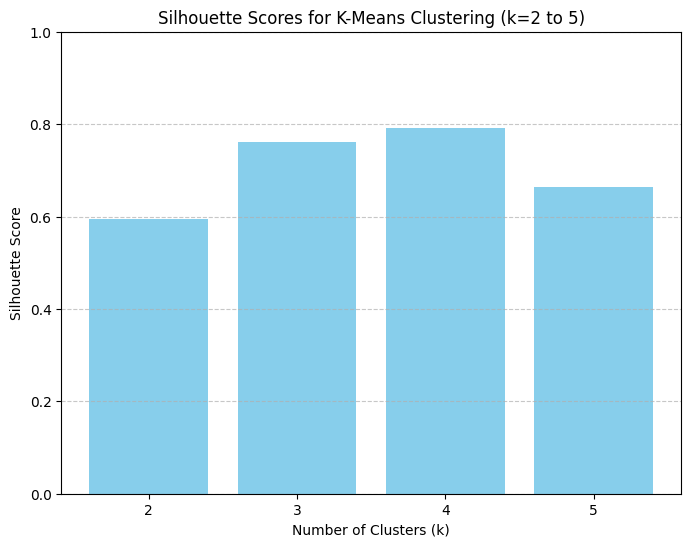

In [65]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Generate synthetic data using make_blobs
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# 2. Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# 3. Display as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(k) for k in k_values], silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering (k=2 to 5)')
plt.ylim(0, 1) # Silhouette score ranges from -1 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

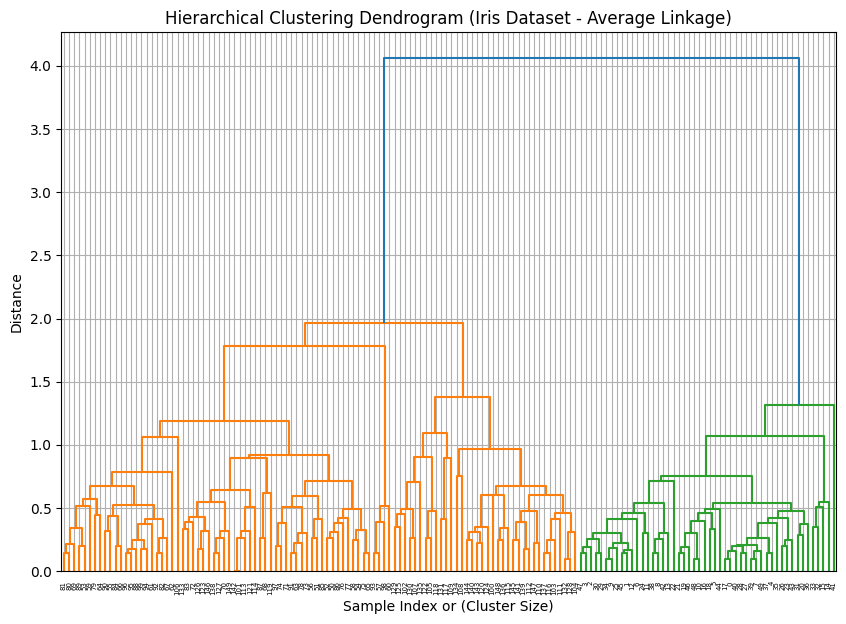

In [66]:
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data

# 2. Perform hierarchical clustering and compute the linkage matrix with average linkage
# 'average' linkage computes the average of the distances between all observations of the two sets
linked = linkage(X_iris, method='average')

# 3. Plot a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset - Average Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

Q31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

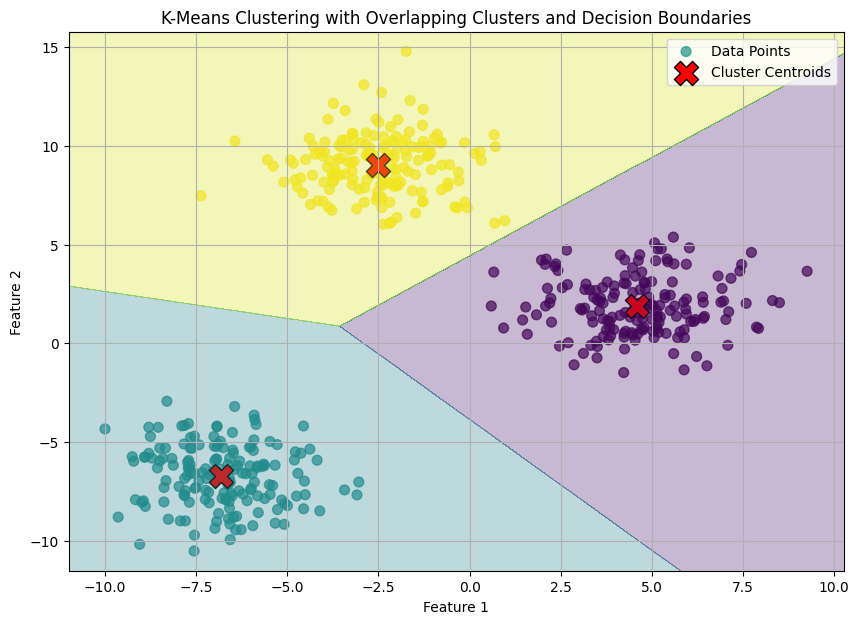

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with overlapping clusters using make_blobs
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
pred_clusters = kmeans.predict(X)

# 3. Visualize with decision boundaries
plt.figure(figsize=(10, 7))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=pred_clusters, s=50, cmap='viridis', alpha=0.7, label='Data Points')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, marker='X', c='red', edgecolors='black', label='Cluster Centroids')

# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('K-Means Clustering with Overlapping Clusters and Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

Applying t-SNE for dimensionality reduction...
t-SNE completed in 15.15 seconds.


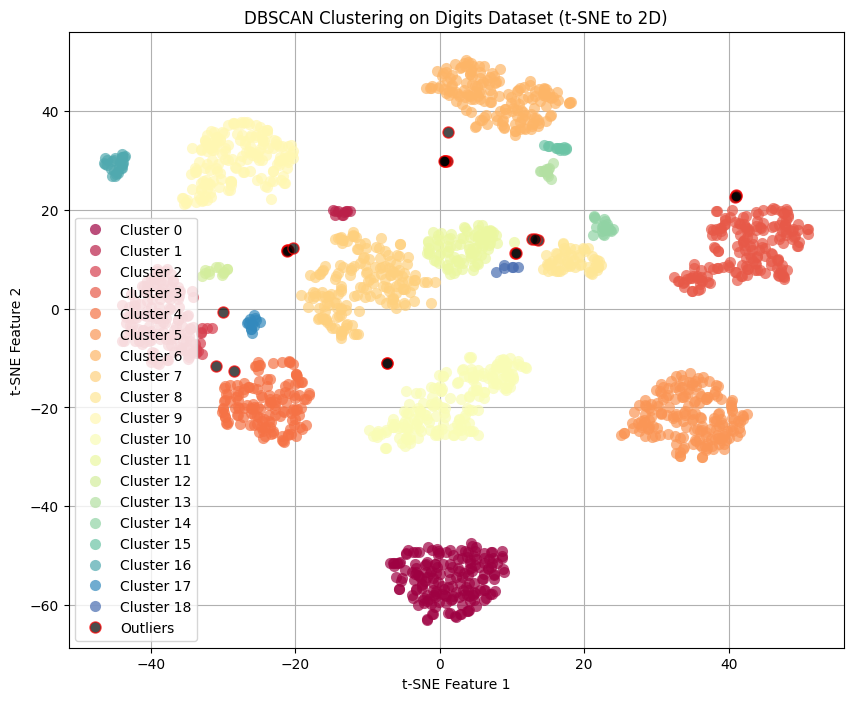

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np
import time

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data

# 2. Reduce dimensions with t-SNE
print("Applying t-SNE for dimensionality reduction...")
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X)
t1 = time.time()
print(f"t-SNE completed in {t1 - t0:.2f} seconds.")

# 3. Apply DBSCAN
# Adjust eps and min_samples for optimal results on the t-SNE output
# For digits, these parameters might need tuning based on the t-SNE projection
dbscan = DBSCAN(eps=2.5, min_samples=5) # Example values, may need adjustment
labels = dbscan.fit_predict(X_tsne)

# 4. Visualize the results
plt.figure(figsize=(10, 8))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1: # Black used for noise/outliers
        col = [0, 0, 0, 1]
        marker_style = 'o'
        edge_color = 'red'
        label_text = 'Outliers'
    else:
        marker_style = 'o'
        edge_color = 'none'
        label_text = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X_tsne[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
             markeredgecolor=edge_color, markersize=8, alpha=0.7, label=label_text)

plt.title('DBSCAN Clustering on Digits Dataset (t-SNE to 2D)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

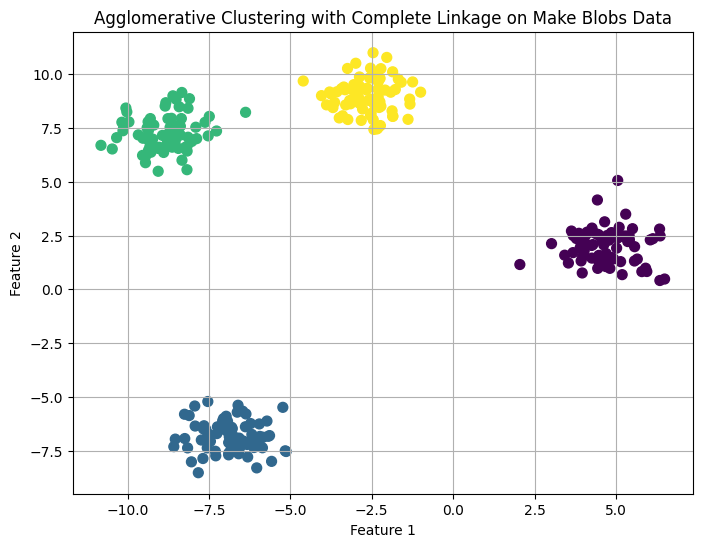

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic data using make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply Agglomerative Clustering with complete linkage
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglomerative_clustering.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with Complete Linkage on Make Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Q34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

Inertia for k=2: 11595.53
Inertia for k=3: 10061.80
Inertia for k=4: 9258.99
Inertia for k=5: 8558.66
Inertia for k=6: 7970.26


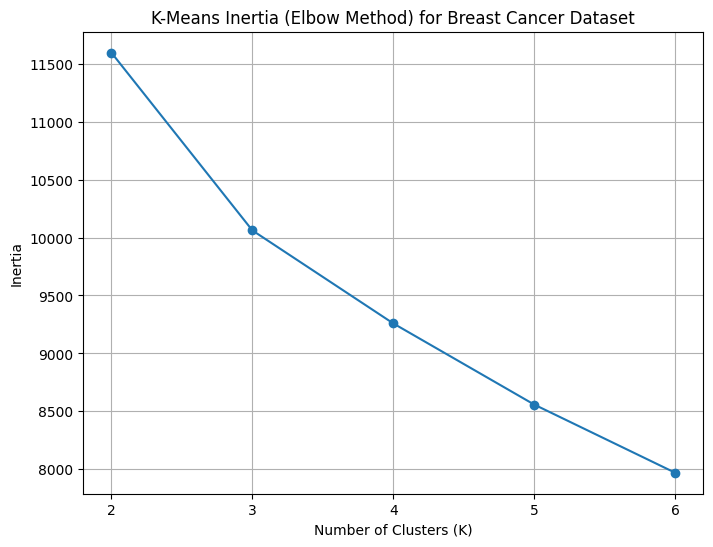

In [70]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Compare inertia values for K = 2 to 6 using K-Means
inertia_values = []
k_values = range(2, 7) # K from 2 to 6

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_:.2f}")

# 3. Show results in a line plot (Elbow Plot)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('K-Means Inertia (Elbow Method) for Breast Cancer Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values) # Ensure K values are shown on x-axis
plt.grid(True)
plt.show()

Q35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

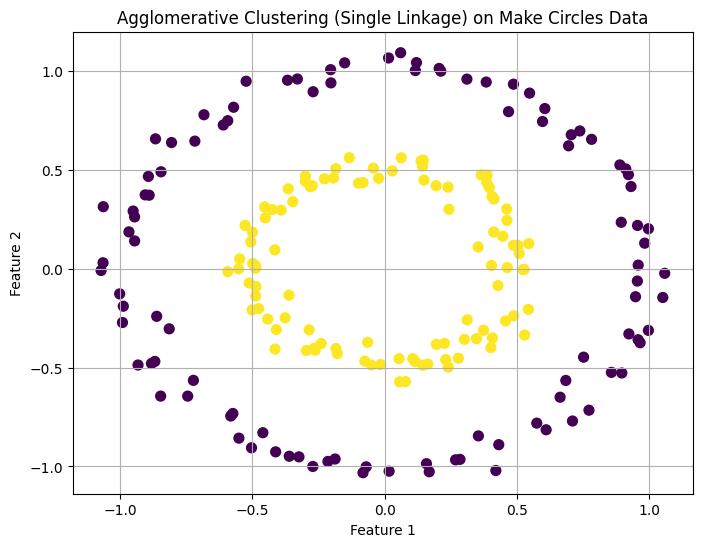

In [71]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic concentric circles using make_circles
X, y_true = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)

# 2. Cluster using Agglomerative Clustering with single linkage
# Single linkage is often effective for elongated or non-globular shapes like circles
agglomerative_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglomerative_clustering.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Single Linkage) on Make Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Q36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [72]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = datasets.load_wine()
X_wine = wine.data

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Apply DBSCAN
# The choice of eps and min_samples can significantly impact results.
# These are example values, often requiring tuning for optimal clustering.
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Count the number of clusters (excluding noise)
# Noise points are labeled as -1 by DBSCAN
unique_clusters = set(labels)
num_clusters = 0
for label in unique_clusters:
    if label != -1:
        num_clusters += 1

print(f"Number of clusters found (excluding noise): {num_clusters}")
print(f"DBSCAN Labels: {labels}")

Number of clusters found (excluding noise): 5
DBSCAN Labels: [ 0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0  1 -1  1  1  1  1  1 -1 -1 -1
 -1  0 -1 -1 -1  0  0  0  0 -1  0  1  0 -1 -1  0 -1  1  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  2  2  2 -1 -1 -1 -1 -1  3  3 -1  3 -1
 -1 -1 -1  4  4 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  4  3  3  2  4 -1 -1  4
 -1 -1  2  4  4 -1  4 -1 -1 -1]


Q37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

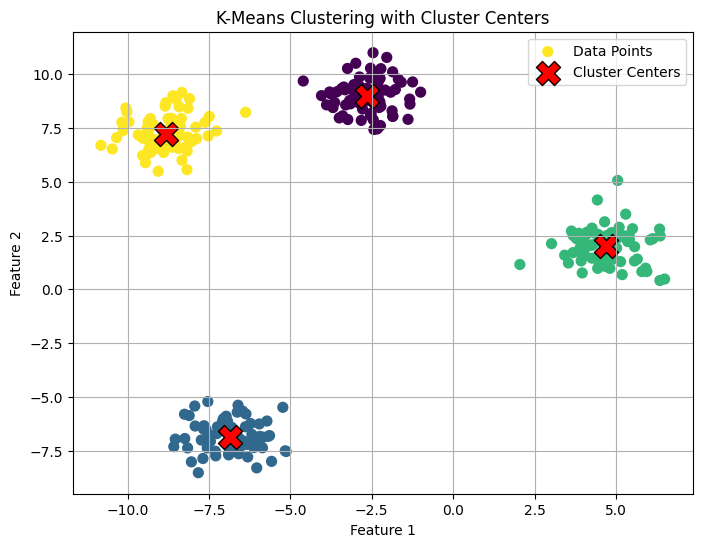

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# 1. Generate synthetic data with make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
pred_clusters = kmeans.fit_predict(X)

# 3. Plot the cluster centers on top of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=pred_clusters, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, marker='X', c='red', edgecolors='black', label='Cluster Centers')

plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [74]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data

# It's often beneficial to scale data for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

# 2. Cluster with DBSCAN
# eps and min_samples might need tuning depending on the dataset characteristics
dbscan = DBSCAN(eps=0.5, min_samples=5) # Example values
labels = dbscan.fit_predict(X_scaled)

# 3. Print how many samples were identified as noise
# DBSCAN labels noise points as -1
num_noise_samples = np.sum(labels == -1)

print(f"Total samples identified as noise: {num_noise_samples}")

Total samples identified as noise: 34


Q39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

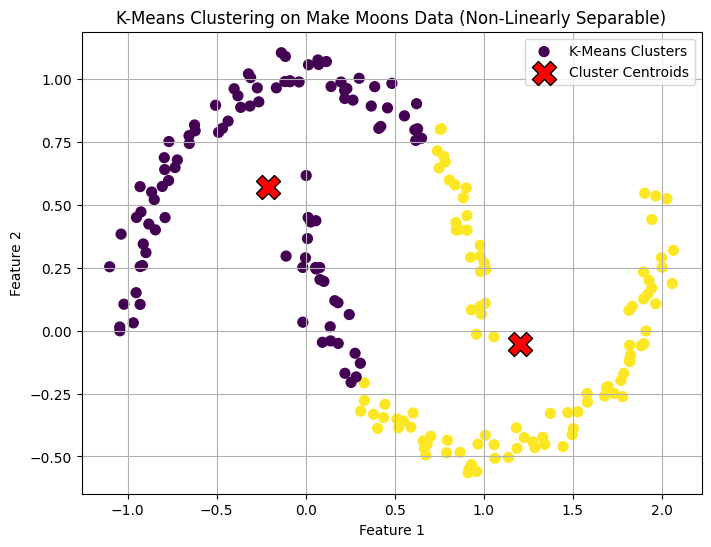

In [75]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import numpy as np

# 1. Generate synthetic non-linearly separable data using make_moons
X, y_true = make_moons(n_samples=200, noise=0.05, random_state=42)

# 2. Apply K-Means clustering
# K-Means assumes spherical clusters, so it might not perform optimally on moon-shaped data.
# We'll try to find 2 clusters as there are typically two 'moons'.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
pred_clusters = kmeans.fit_predict(X)

# 3. Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=pred_clusters, s=50, cmap='viridis', label='K-Means Clusters')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, marker='X', c='red', edgecolors='black', label='Cluster Centroids')

plt.title('K-Means Clustering on Make Moons Data (Non-Linearly Separable)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

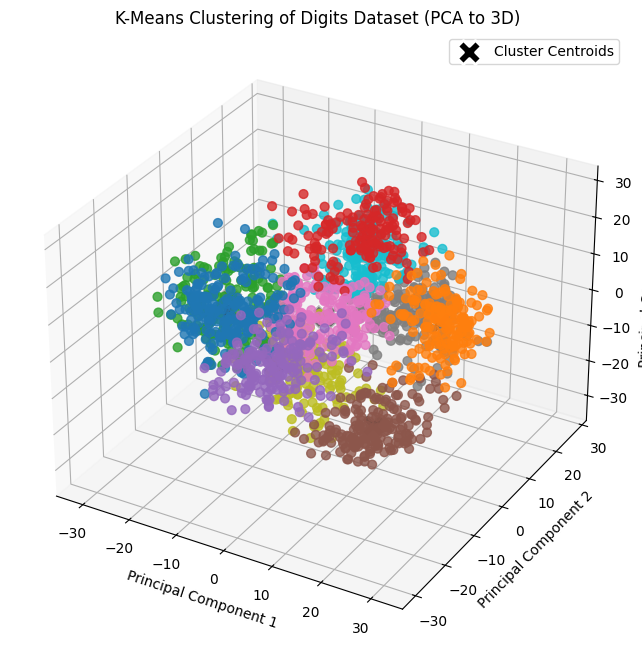

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data

# 2. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# 3. Use KMeans clustering (Digits dataset has 10 classes)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
pred_clusters = kmeans.fit_predict(X_pca_3d)

# 4. Visualize with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=pred_clusters, cmap='tab10', s=40, alpha=0.8)

# Plot the cluster centroids
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2],
           s=300, marker='X', c='black', edgecolors='white', linewidth=2,
           label='Cluster Centroids')

ax.set_title('K-Means Clustering of Digits Dataset (PCA to 3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.grid(True)
plt.show()

Q41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

The average silhouette score for 5 clusters is: 0.7337


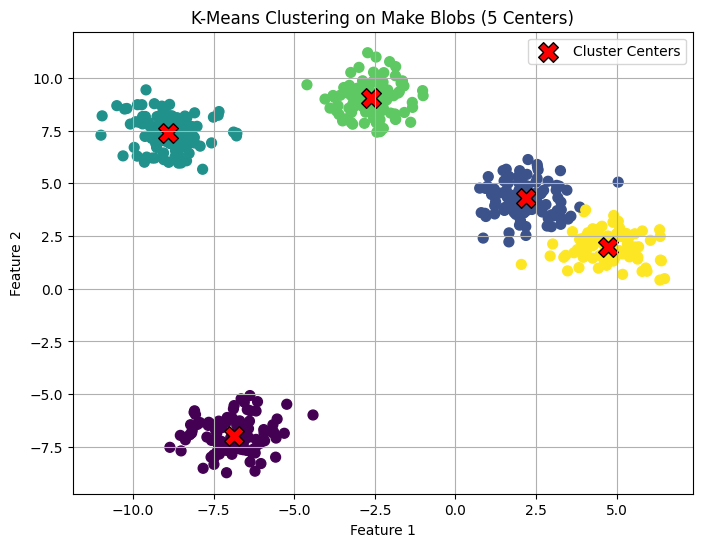

In [77]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Generate synthetic data using make_blobs with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.8, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# 3. Evaluate the clustering using silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"The average silhouette score for 5 clusters is: {silhouette_avg:.4f}")

# Optional: Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker='X', c='red', edgecolors='black', label='Cluster Centers')
plt.title('K-Means Clustering on Make Blobs (5 Centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

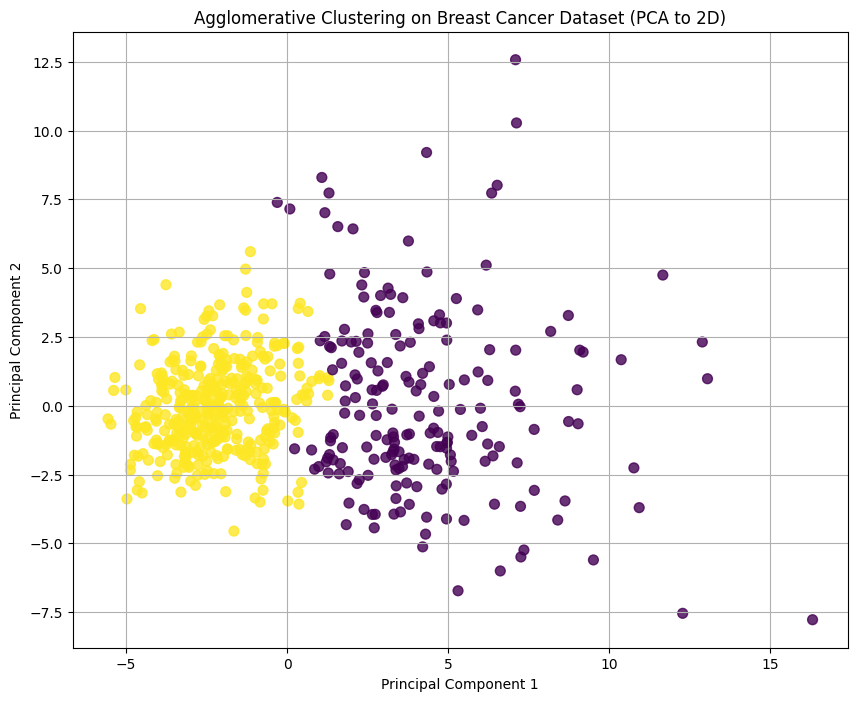

In [78]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1. Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y_true = breast_cancer.target # For reference, not used in clustering

# Standardize the data (often beneficial before PCA and clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reduce dimensionality using PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply Agglomerative Clustering
# We'll assume 2 clusters, corresponding to the two classes in the dataset (malignant/benign)
agglomerative = AgglomerativeClustering(n_clusters=2)
labels = agglomerative.fit_predict(X_pca)

# 4. Visualize in 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)

plt.title('Agglomerative Clustering on Breast Cancer Dataset (PCA to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Q43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

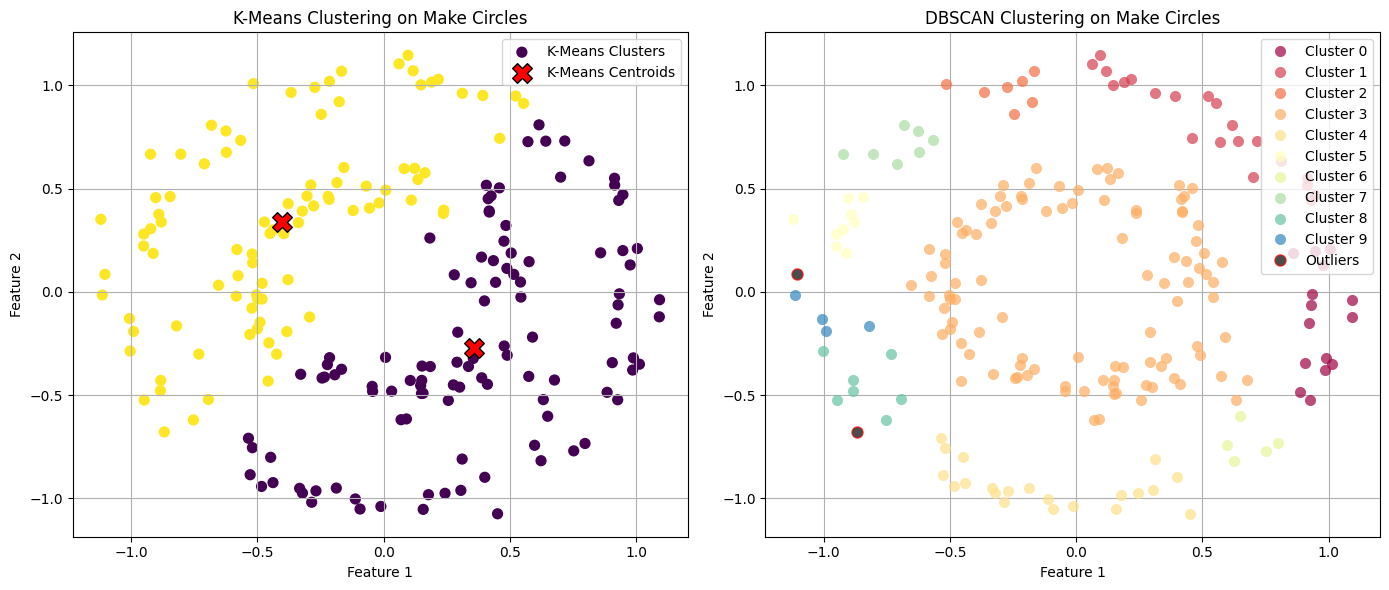

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# 1. Generate noisy circular data
X, y_true = make_circles(n_samples=200, noise=0.08, factor=0.5, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# 3. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5) # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)

# 4. Visualize clustering results side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot KMeans results
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis', label='K-Means Clusters')
axes[0].scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=200, marker='X', c='red', edgecolors='black', label='K-Means Centroids')
axes[0].set_title('K-Means Clustering on Make Circles')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True)

# Plot DBSCAN results
unique_dbscan_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_dbscan_labels))]

for k, col in zip(unique_dbscan_labels, colors):
    if k == -1: # Black for noise (outliers)
        col = [0, 0, 0, 1]
        marker_style = 'o'
        edge_color = 'red'
        label_text = 'Outliers'
    else:
        marker_style = 'o'
        edge_color = 'none'
        label_text = f'Cluster {k}'

    class_member_mask = (dbscan_labels == k)

    xy = X[class_member_mask]
    axes[1].plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
                 markeredgecolor=edge_color, markersize=8, alpha=0.7, label=label_text)

axes[1].set_title('DBSCAN Clustering on Make Circles')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Q44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

The average silhouette score for 3 clusters is: 0.5528


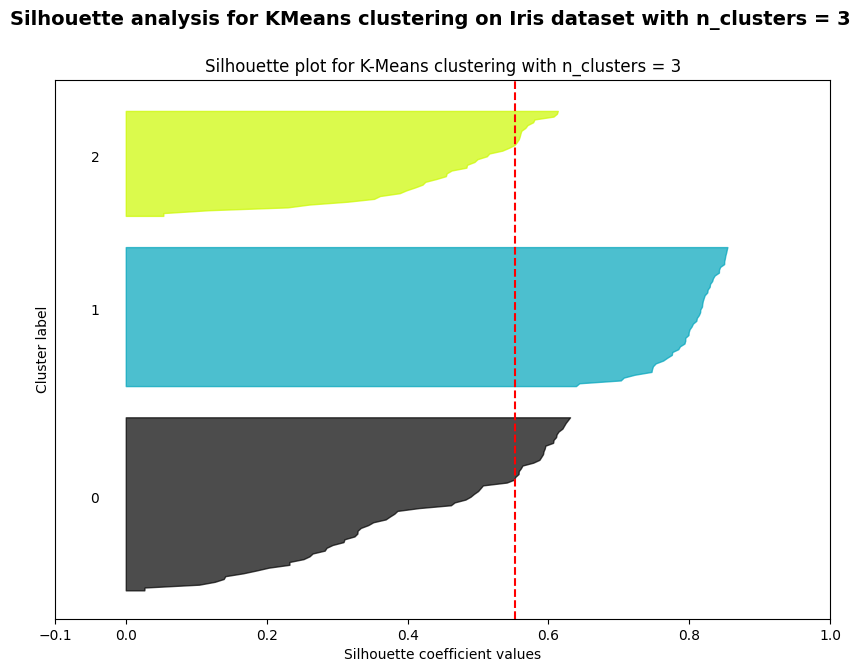

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# 2. Apply K-Means clustering (Iris has 3 known classes)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# 3. Calculate the Silhouette Coefficient for each sample
silhouette_per_sample = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"The average silhouette score for {k} clusters is: {silhouette_avg:.4f}")

# 4. Plot the Silhouette Coefficient for each sample
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# values are positive.
ax1.set_xlim([-0.1, 1])
# The (k+1)*10 is for inserting blank space between silhouette plots of individual clusters, to make them stand out.
ax1.set_ylim([0, len(X) + (k + 1) * 10])

y_lower = 10
for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        silhouette_per_sample[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title(f"Silhouette plot for K-Means clustering with n_clusters = {k}")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Silhouette analysis for KMeans clustering on Iris dataset "
                f"with n_clusters = {k}"),
               fontsize=14, fontweight='bold')
plt.show()

Q45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

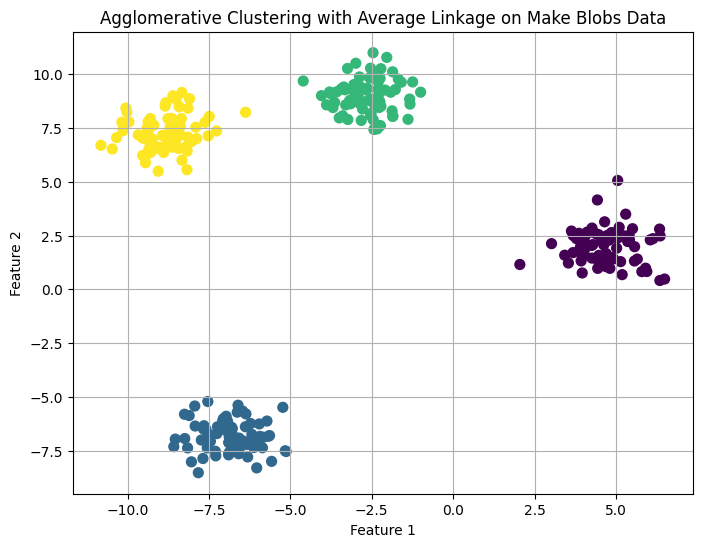

In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic data using make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply Agglomerative Clustering with 'average' linkage
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglomerative_clustering.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with Average Linkage on Make Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Q46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

<Figure size 1000x800 with 0 Axes>

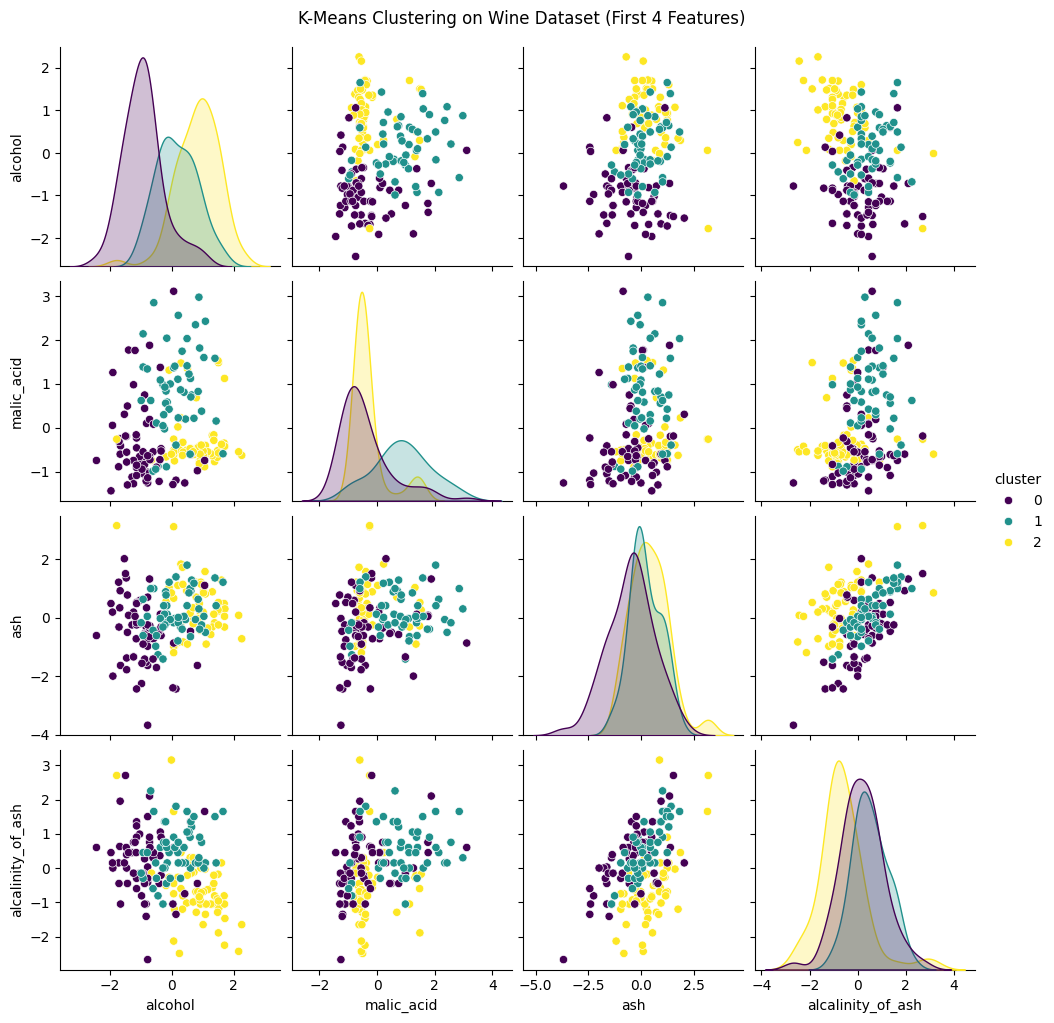

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load the Wine dataset
wine = datasets.load_wine()
X_wine = wine.data
y_true = wine.target # True labels (for reference, not used in clustering)

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 2. Apply K-Means clustering (Wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_assignments = kmeans.fit_predict(X_scaled)

# Create a DataFrame for visualization, including cluster assignments
# Select the first 4 features as requested
wine_df = pd.DataFrame(X_scaled[:, :4], columns=wine.feature_names[:4])
wine_df['cluster'] = cluster_assignments

# 3. Visualize the cluster assignments in a seaborn pairplot (first 4 features)
plt.figure(figsize=(10, 8))
sns.pairplot(wine_df, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('K-Means Clustering on Wine Dataset (First 4 Features)', y=1.02) # Adjust suptitle position
plt.show()

Q47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

Number of identified clusters (excluding noise): 6
Number of noise points: 90


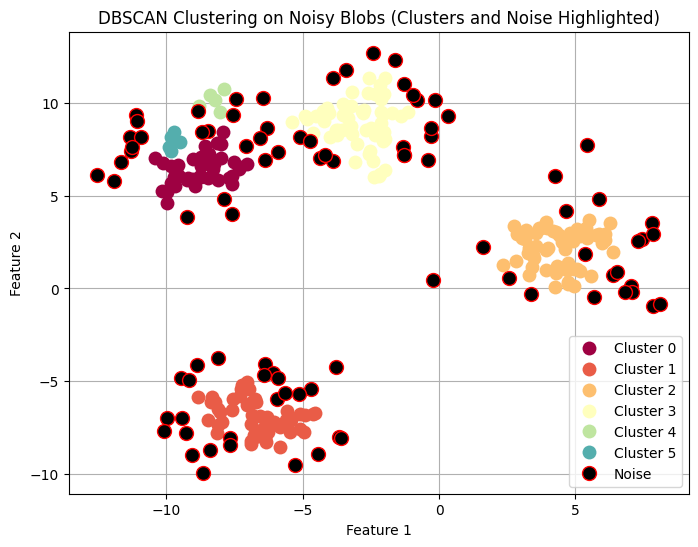

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate noisy blobs using make_blobs
# Increasing cluster_std and adding noise to make it noisy
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)

# 2. Use DBSCAN to identify both clusters and noise points
# Adjust eps and min_samples for optimal results on noisy data
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Print the count of clusters and noise points
unique_labels = set(labels)
num_clusters = 0
num_noise_points = 0

for label in unique_labels:
    if label == -1:
        num_noise_points = np.sum(labels == label)
    else:
        num_clusters += 1

print(f"Number of identified clusters (excluding noise): {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Optional: Visualize the result
plt.figure(figsize=(8, 6))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1: # Black used for noise.
        col = [0, 0, 0, 1]
        marker_style = 'o'
        edge_color = 'red'
        label_text = 'Noise'
    else:
        marker_style = 'o'
        edge_color = 'none'
        label_text = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker_style, markerfacecolor=tuple(col),
             markeredgecolor=edge_color, markersize=10, label=label_text)

plt.title('DBSCAN Clustering on Noisy Blobs (Clusters and Noise Highlighted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Q48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

Applying t-SNE for dimensionality reduction...
t-SNE completed in 15.03 seconds.


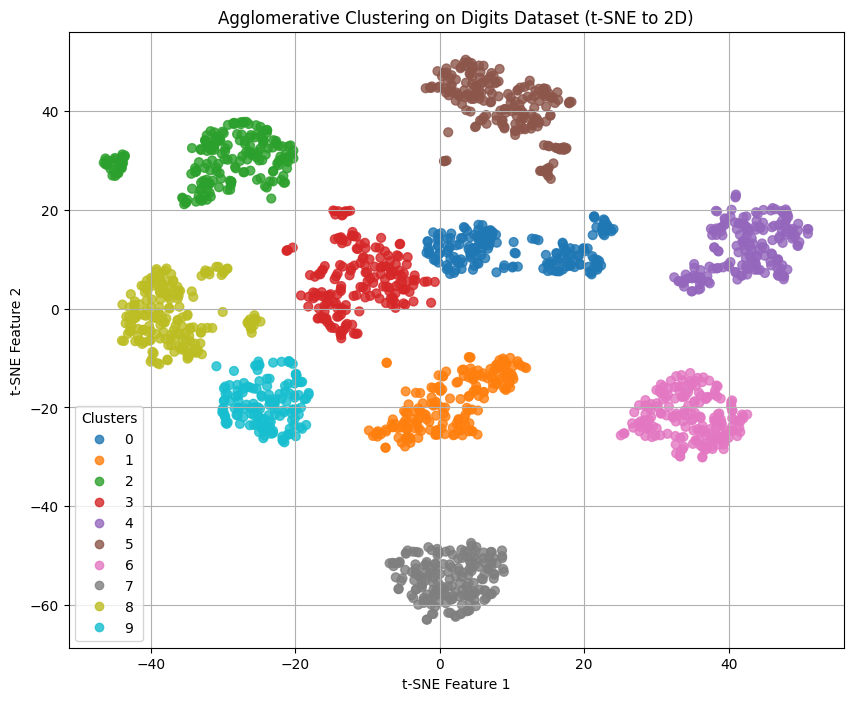

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data

# 2. Reduce dimensions with t-SNE
print("Applying t-SNE for dimensionality reduction...")
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X)
t1 = time.time()
print(f"t-SNE completed in {t1 - t0:.2f} seconds.")

# 3. Apply Agglomerative Clustering (Digits dataset has 10 classes)
agglomerative = AgglomerativeClustering(n_clusters=10) # We expect 10 clusters for digits 0-9
labels = agglomerative.fit_predict(X_tsne)

# 4. Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=40, alpha=0.8)

plt.title('Agglomerative Clustering on Digits Dataset (t-SNE to 2D)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()